![My Logo](https://thoughtsociety.org/wp-content/uploads/2019/03/ts_notebook_header.png)

# K Nearest Neighbors to Predict Breast Cancer

This has some derivation from both a Kaggle competition and KNN Lecture from Jose Portilla  on Udemy.

We will use the UCI/Kaggle Breast Cancer Dataset.

This dataset will allow us to predict if an observation is likely to be in either the **benign or malignant class**.
We will use **KNN** to make a binary classification based on around 30 features that were measured in a **morphological** (shapes of cellular features) study of breast tissue. Each observation is a patient.

After doing some EDA, using **LMplot** to examine a couple of significant features with the **Hue set by 'diagnosis'** which is the target variable.

In the original data, we will see that the binary target variable that is shown would be predictable to a fairly high degree of accuracy, given features that indicate it.  Using this as a training set will work well with KNN.

An important aspect of this demo is to choose a **'k' value that produces the highest accuracy with the lowest error rate**.

We will need to scale the data using **scikitlearn.Standard_Scaler** while fitting (training) in order to minimize overfitting from values that are too large.

We will **loop through 40 values for K**, plot the error curve and visually choose an optimal value for K. We will try two values and compare the results.

### Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#df = pd.read_csv('https://s3.us-east-2.amazonaws.com/tswrkdataset/ads-course/track4/breastCancer.csv')
df = pd.read_csv('https://raw.githubusercontent.com/thoughtsociety/ads_track4/master/datasets/breastCancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

### Get rid of a couple of features we do not need

In [4]:
df = df.drop(['id','Unnamed: 32'],axis=1)

#### We will perform a categorical to numeric conversion - Typically done with get_dummies to convert 'm' and 'b' to 1 and 0 respectively

In [5]:
def diagnosis_value(diagnosis):
    if diagnosis == 'M':
        return 1
    else:
        return 0

df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)

In [29]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Let's explore this data visually
Using lmplot, we can look at the radius mean vs. texture mean setting hue by the diagnosis (target)

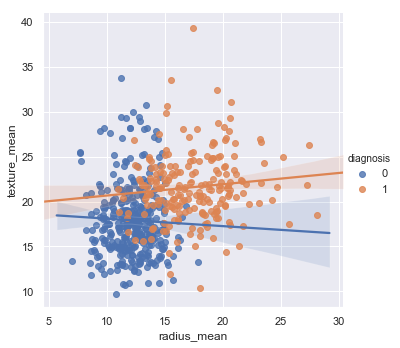

In [6]:
sns.set()
sns.lmplot(x = 'radius_mean', y= 'texture_mean', hue = 'diagnosis',data = df)

Again using lmplot, we can look at the smoothness mean vs. compactness mean setting hue by the diagnosis (target)

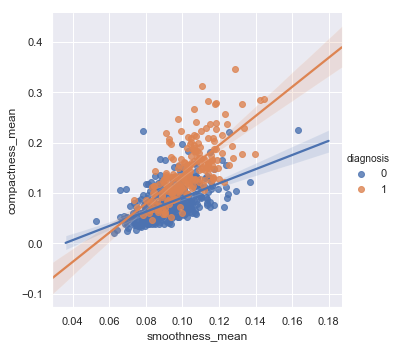

In [7]:
sns.lmplot(x='smoothness_mean', y = 'compactness_mean', data = df, hue = 'diagnosis')

## Scikitlearn StandardScaler to Pre-Process Our Data

Prediction of our two classes using KNN depends on observations which may be near each other. Scaling will separate them more optimally to avoid over-fitting.

First, we will run a fit using the scaler object which centers our data, storing mean and standard deviation so it can be applied to the transform step.

Next, we transform (scale) our data prior to the KNN analysis.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
# Drop the target
scaler.fit(df.drop('diagnosis',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
# Scale everything except the target

In [12]:
scaled_features = scaler.transform(df.drop('diagnosis',axis=1))

In [13]:
scaled_features

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [14]:
# Create a new df just for features based on scaled_features, keeping columns 1 to the end while excludin target
df_feat = pd.DataFrame(scaled_features,columns=df.columns[1:])
df_feat.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Ready for train_test_split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['diagnosis'],test_size=0.33, random_state=42)

In [17]:
# Import the KNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# Instantiate the knn classifier starting out with n_neighbors = 1
knn = KNeighborsClassifier(n_neighbors=1)

In [19]:
# Perform the fit on training data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [20]:
# What does our score look like? (Mean accuracy)
knn.score(X_test,y_test)

0.9414893617021277

In [21]:
# Let's run a prediction on X_test
pred = knn.predict(X_test)
pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0])

In [22]:
# Import metric tools

from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(confusion_matrix(y_test,pred))

[[116   5]
 [  6  61]]


In [24]:
# Here are our results with K=1
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       121
           1       0.92      0.91      0.92        67

    accuracy                           0.94       188
   macro avg       0.94      0.93      0.94       188
weighted avg       0.94      0.94      0.94       188



## Choosing a K Value

As is typical for selecting the best value for 'k' when using KNN, use the elbow method.

This allows us to iterate through 40 potential 'k' values and to look at the resulting graph for the 'elbow' of the curve which will show us the lowest error and its corresponding k value.

Here is the loop:

* invoking the classfier with i n_neighbors
* running a new fit
* running a prediction
* calculating and updating the error rate list using the mean when pred != test (which is an error) 


In [25]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

### Now we can plot error rate vs. K value

Visually look for a minimal error rate and select the corresponding K value for our next run

Text(0, 0.5, 'Error Rate')

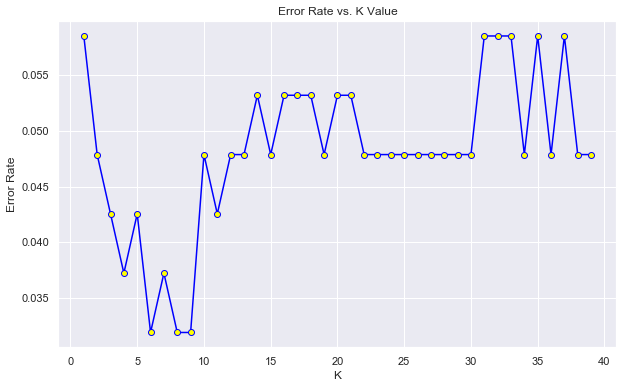

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', marker='.',
         markerfacecolor='yellow', markersize=12)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### For this dataset, 6 appears to be the best 'k' value to use

Let's run K=1 one more time 

In [27]:
# Look at K=1 again

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[116   5]
 [  6  61]]


              precision    recall  f1-score   support

           0       0.95      0.96      0.95       121
           1       0.92      0.91      0.92        67

    accuracy                           0.94       188
   macro avg       0.94      0.93      0.94       188
weighted avg       0.94      0.94      0.94       188



### Now let's run it again with K=7

In [28]:
# The elbow selected K=6
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=7')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=7


[[119   2]
 [  4  63]]


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       121
           1       0.97      0.94      0.95        67

    accuracy                           0.97       188
   macro avg       0.97      0.96      0.96       188
weighted avg       0.97      0.97      0.97       188



### Somewhat better accuracy with lower error rate by using K=9 for the breastCancer dataset.

With KNN, you will often see some kind of k-finding loop in the code just because this works well.
The k value will of course be different for different datsets but lower error does produce a well separated binary classification when using KNN.